In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import seaborn as sns
import datetime as dt

from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
from sklearn import metrics

In [2]:
curated_pkl = pd.read_pickle('curated_df.pkl')

In [3]:
df=curated_pkl.copy()

In [4]:
df.head()

,id_equipo,nombre_producto,capacidad,industria,volumen_escl,consumo_escl
timestamp,,,,,,
2021-01-01 00:00:00,477,VP Nafta,15032,Service Station,0.0575871,0
2021-01-01 00:05:00,477,VP Nafta,15032,Service Station,0.0575871,0
2021-01-01 00:10:00,477,VP Nafta,15032,Service Station,0.0575871,0
2021-01-01 00:15:00,477,VP Nafta,15032,Service Station,0.0575871,0
2021-01-01 00:20:00,477,VP Nafta,15032,Service Station,0.0575428,1.10766e-05


In [5]:
df_fil=df.loc[:"2021-01-7"]

In [14]:
df_fil.head()

,id_equipo,nombre_producto,capacidad,industria,volumen_escl,consumo_escl
timestamp,,,,,,
2021-01-01 00:00:00,477,VP Nafta,15032,Service Station,0.0575871,0
2021-01-01 00:05:00,477,VP Nafta,15032,Service Station,0.0575871,0
2021-01-01 00:10:00,477,VP Nafta,15032,Service Station,0.0575871,0
2021-01-01 00:15:00,477,VP Nafta,15032,Service Station,0.0575871,0
2021-01-01 00:20:00,477,VP Nafta,15032,Service Station,0.0575428,1.10766e-05


In [9]:
#df_fil=df_fil.reset_index()

In [6]:
df_fil.industria.unique()

array(['Service Station', 'Agriculture', 'Transportation', 'Oil&Gas',
       'Unknown', 'Mining', 'Construction', 'Industry', 'Public',
       'Telcos', 'Distributor'], dtype=object)

In [7]:
df_fil.industria.value_counts()

Service Station    78081
Telcos             76596
Transportation     68929
Agriculture        18318
Construction       17192
Oil&Gas            12096
Industry           10080
Unknown             6418
Mining              4032
Public              2653
Distributor          409
Name: industria, dtype: int64

In [8]:
df_fil.id_equipo.unique()

array(['477', '533', '459', '520', '543', '537', '541', '540', '550',
       '551', '553', '554', '569', '578', '593', '595', '600', '618',
       '495', '643', '627', '636', '637', '638', '441', '644', '642',
       '648', '654', '626', '501', '661', '665', '679', '681', '683',
       '686', '682', '680', '687', '696', '697', '717', '715', '725',
       '719', '723', '724', '727', '729', '730', '731', '733', '734',
       '735', '742', '743', '741', '745', '746', '747', '751', '759',
       '677', '769', '771', '783', '841', '799', '801', '806', '800',
       '814', '794', '827', '831', '480', '842', '849', '851', '854',
       '853', '867', '869', '871', '838', '874', '887', '900', '479',
       '484', '453', '486', '515', '531', '159', '248', '227', '299',
       '356', '357', '421', '433', '455', '429', '740', '816', '788',
       '890', '912', '916', '915', '914', '913', '918', '920', '919',
       '431', '220', '629', '828', '896', '508', '922', '925', '921',
       '930', '927',

In [9]:
df_fil.id_equipo.value_counts()[:20]

495    8064
486    8064
900    8064
357    8064
429    8064
799    8064
248    6048
800    6048
159    5796
477    4032
724    4032
874    4032
838    4032
677    4032
578    4032
520    4032
696    2016
842    2016
638    2016
627    2016
Name: id_equipo, dtype: int64

In [10]:
df_fil=df_fil[(df_fil["id_equipo"]=="900")|(df_fil["id_equipo"]=="495")|(df_fil["id_equipo"]=="357")|(df_fil["id_equipo"]=="799")|(df_fil["id_equipo"]=="799")|(df_fil["id_equipo"]=="429")|(df_fil["id_equipo"]=="486")|(df_fil["id_equipo"]=="248")|(df_fil["id_equipo"]=="800")|(df_fil["id_equipo"]=="159")|(df_fil["id_equipo"]=="838")|(df_fil["id_equipo"]=="677")|(df_fil["id_equipo"]=="520")|(df_fil["id_equipo"]=="578")|(df_fil["id_equipo"]=="874")|(df_fil["id_equipo"]=="724")|(df_fil["id_equipo"]=="477")|(df_fil["id_equipo"]=="751")|(df_fil["id_equipo"]=="648")|(df_fil["id_equipo"]=="626")|(df_fil["id_equipo"]=="610")]

In [11]:
len(df_fil)

100548

In [12]:
df_fil.id_equipo.value_counts()

486    8064
900    8064
357    8064
429    8064
495    8064
799    8064
248    6048
800    6048
159    5796
677    4032
724    4032
477    4032
520    4032
578    4032
874    4032
838    4032
626    2016
648    2016
751    2016
Name: id_equipo, dtype: int64

In [13]:
features=df_fil[["capacidad", "volumen_escl", "consumo_escl"]]

In [14]:
features

,capacidad,volumen_escl,consumo_escl
timestamp,,,
2021-01-01 00:00:00,15032,0.0575871,0
2021-01-01 00:05:00,15032,0.0575871,0
2021-01-01 00:10:00,15032,0.0575871,0
2021-01-01 00:15:00,15032,0.0575871,0
2021-01-01 00:20:00,15032,0.0575428,1.10766e-05
...,...,...,...
2021-01-07 23:35:00,20000,0.11093,0
2021-01-07 23:40:00,20000,0.11093,0
2021-01-07 23:45:00,20000,0.11093,0


In [15]:
features.columns

Index(['capacidad', 'volumen_escl', 'consumo_escl'], dtype='object')

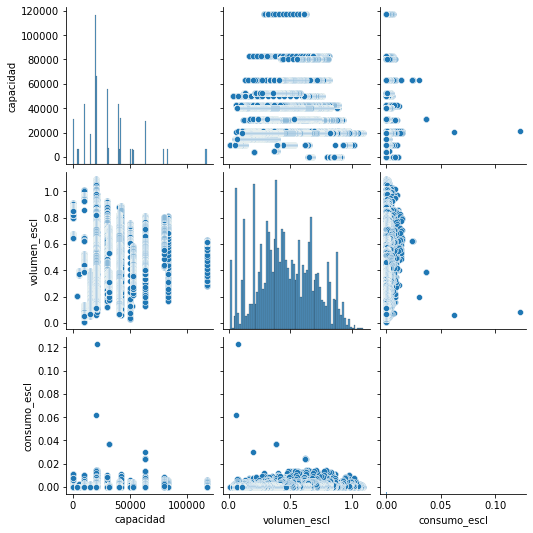

In [16]:
sns_plot=sns.pairplot(features)
sns_plot

### Kmeans

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

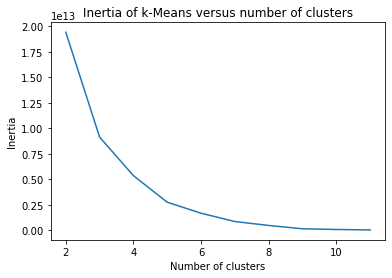

In [17]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(features).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Automatically created module for IPython interactive environment
Para n_clusters = 2 El silhouette_score promedio es : 0.6396737819381245
Para n_clusters = 3 El silhouette_score promedio es : 0.6529813845187598
Para n_clusters = 4 El silhouette_score promedio es : 0.6571449702132405
Para n_clusters = 5 El silhouette_score promedio es : 0.682648520821924
Para n_clusters = 6 El silhouette_score promedio es : 0.7201427642397175


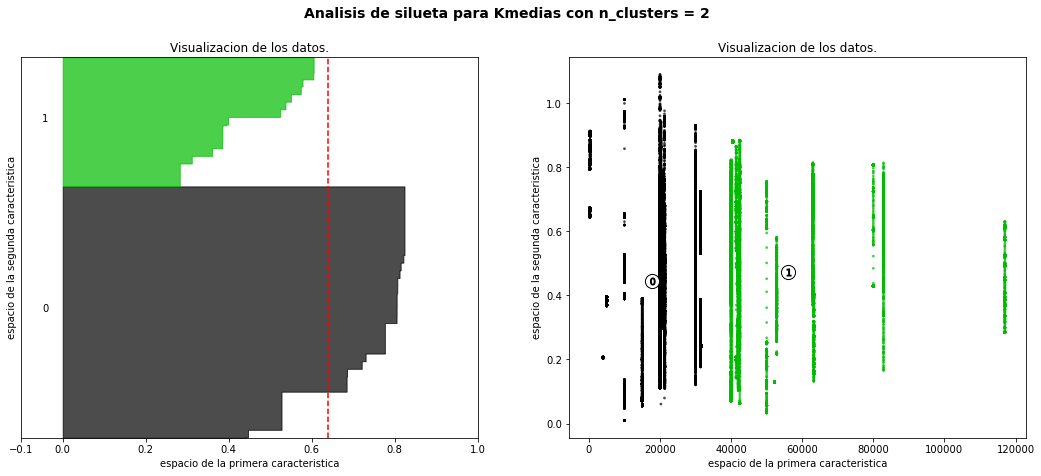

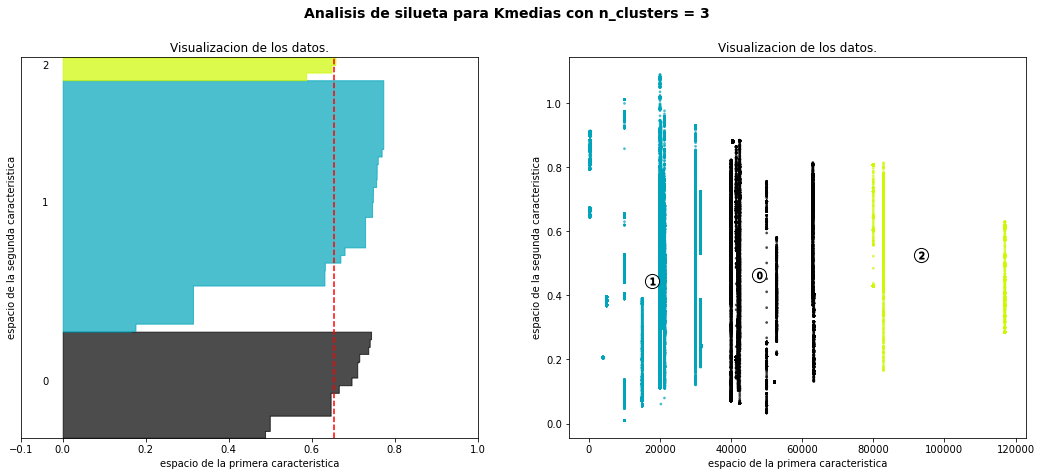

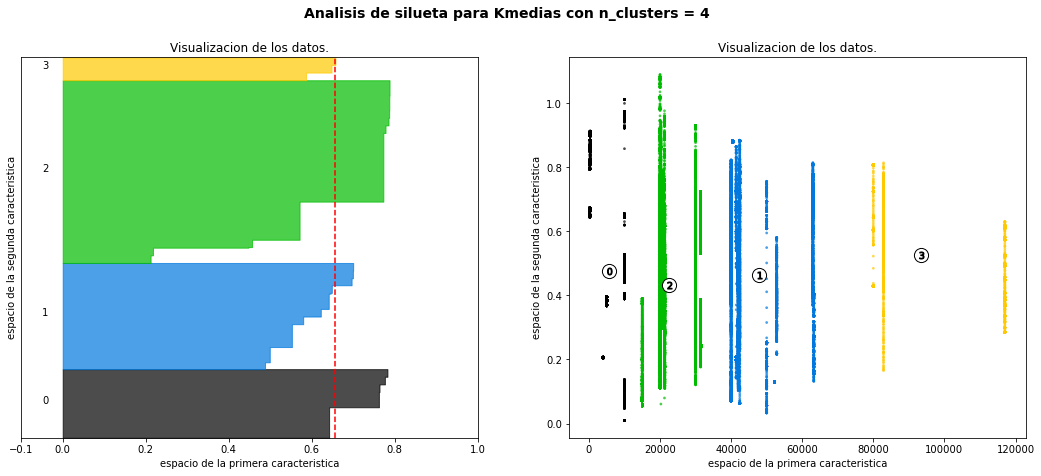

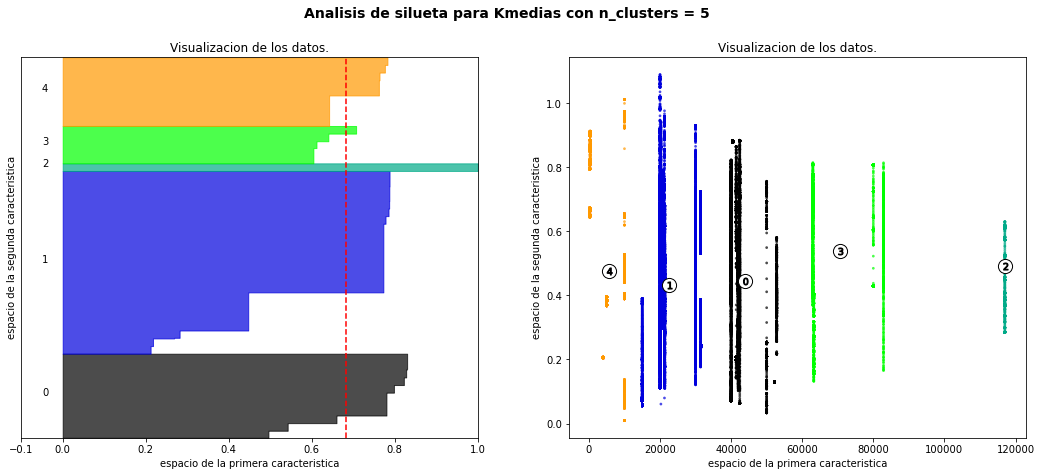

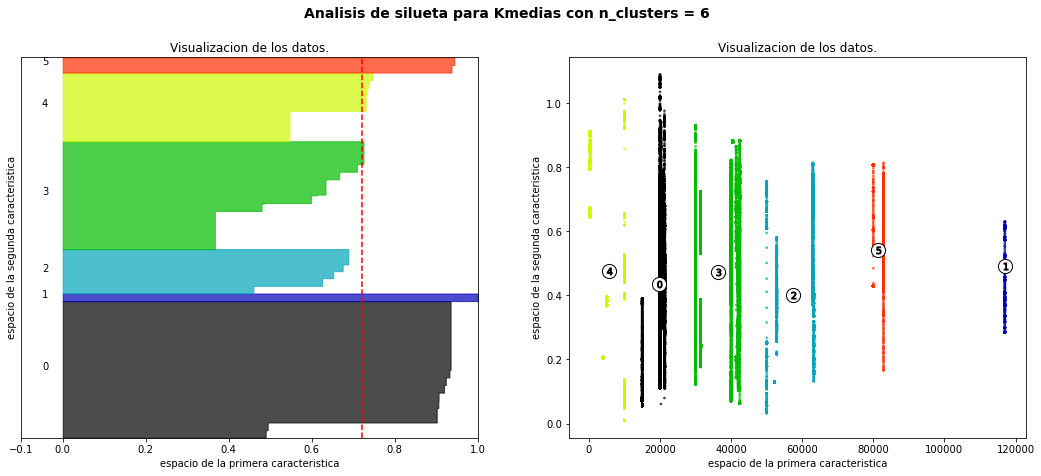

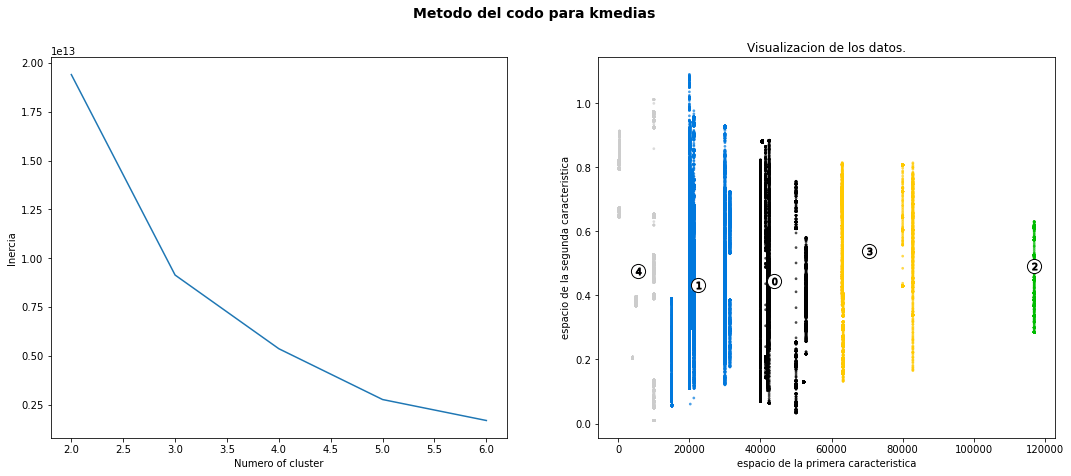

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X=features

range_n_clusters = [2,3, 4, 5, 6]
sse ={}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel("espacio de la primera caracteristica")
    ax2.set_ylabel("espacio de la segunda caracteristica")

    plt.suptitle(("Analisis de silueta para Kmedias "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
plt.suptitle(("Metodo del codo para kmedias "),
                 fontsize=14, fontweight='bold')
ax1.plot(list(sse.keys()), list(sse.values()))
ax1.set_xlabel("Numero of cluster")
ax1.set_ylabel("Inercia")

clusterer = KMeans(n_clusters=5, random_state=10)
cluster_labels = clusterer.fit_predict(X)
    
colors = cm.nipy_spectral(cluster_labels.astype(float) / 4)
ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title("Visualizacion de los datos.")
ax2.set_xlabel("espacio de la primera caracteristica")
ax2.set_ylabel("espacio de la segunda caracteristica")

#plt.savefig("kmeans_elbow", dpi=300)
plt.show()

In [20]:
# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust, random_state=10)
km.fit(features) #utiliza todas las habilidades: 34 dimensiones

# Recuperacion de etiquetas
clusters = km.labels_

In [21]:
df_fil["kmeans"]=km.labels_

In [22]:
kmean_clusters = go.Scatter(x=features["capacidad"], y=features["volumen_escl"],
                           mode='markers',
                        text=df_fil.loc[:,'id_equipo'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )
data=[kmean_clusters]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title="Capacidad"),
                yaxis=dict(title="Volumen"),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

In [31]:
df_fil=df_fil.reset_index()

In [32]:
df_fil.kmeans.value_counts()

1    48301
0    22222
4    18144
3     9865
2     2016
Name: kmeans, dtype: int64

In [34]:
df_fil

,timestamp,id_equipo,nombre_producto,capacidad,industria,volumen_escl,consumo_escl,kmeans
0,2021-01-01 00:00:00,477,VP Nafta,15032,Service Station,0.0575871,0,1
1,2021-01-01 00:05:00,477,VP Nafta,15032,Service Station,0.0575871,0,1
2,2021-01-01 00:10:00,477,VP Nafta,15032,Service Station,0.0575871,0,1
3,2021-01-01 00:15:00,477,VP Nafta,15032,Service Station,0.0575871,0,1
4,2021-01-01 00:20:00,477,VP Nafta,15032,Service Station,0.0575428,1.10766e-05,1
...,...,...,...,...,...,...,...,...
100543,2021-01-07 23:35:00,429,V-Power Nitro,20000,Service Station,0.11093,0,1
100544,2021-01-07 23:40:00,429,V-Power Nitro,20000,Service Station,0.11093,0,1
100545,2021-01-07 23:45:00,429,V-Power Nitro,20000,Service Station,0.11093,0,1
100546,2021-01-07 23:50:00,429,V-Power Nitro,20000,Service Station,0.11093,0,1


<AxesSubplot:xlabel='industria', ylabel='kmeans'>

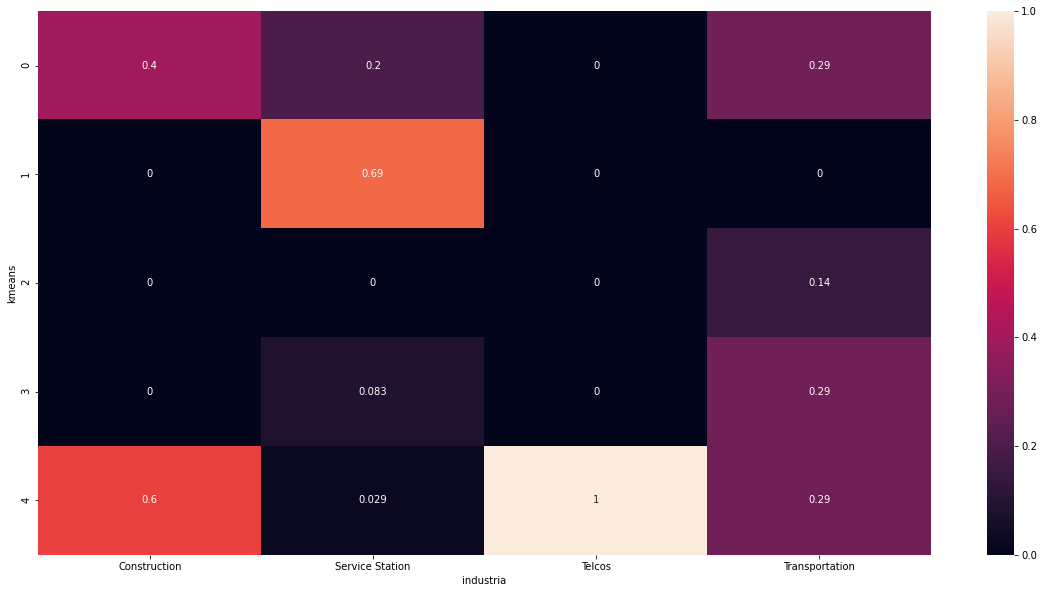

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df_fil.kmeans, df_fil.industria, normalize='columns'),annot=True)

<AxesSubplot:xlabel='capacidad', ylabel='volumen_escl'>

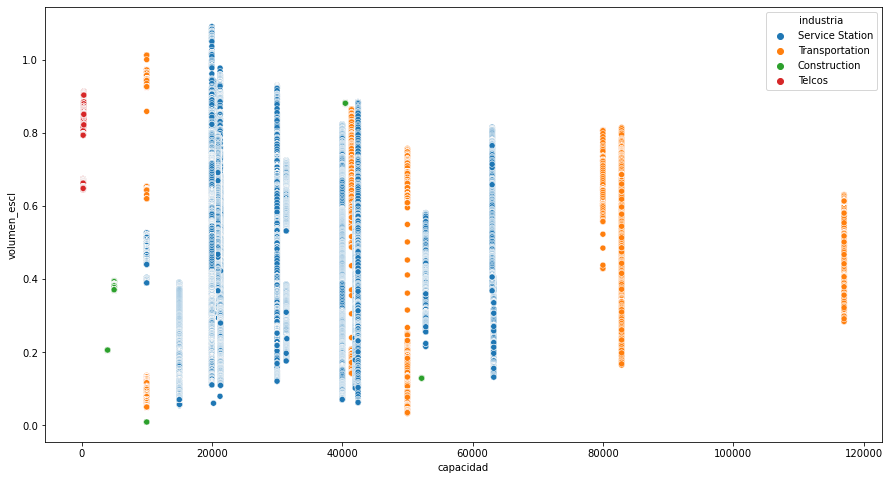

In [44]:
fig = plt.figure(figsize=(15,8))
sns.scatterplot(x=df_fil["capacidad"], y=df_fil["volumen_escl"], hue=df_fil.industria)


<AxesSubplot:xlabel='nombre_producto', ylabel='kmeans'>

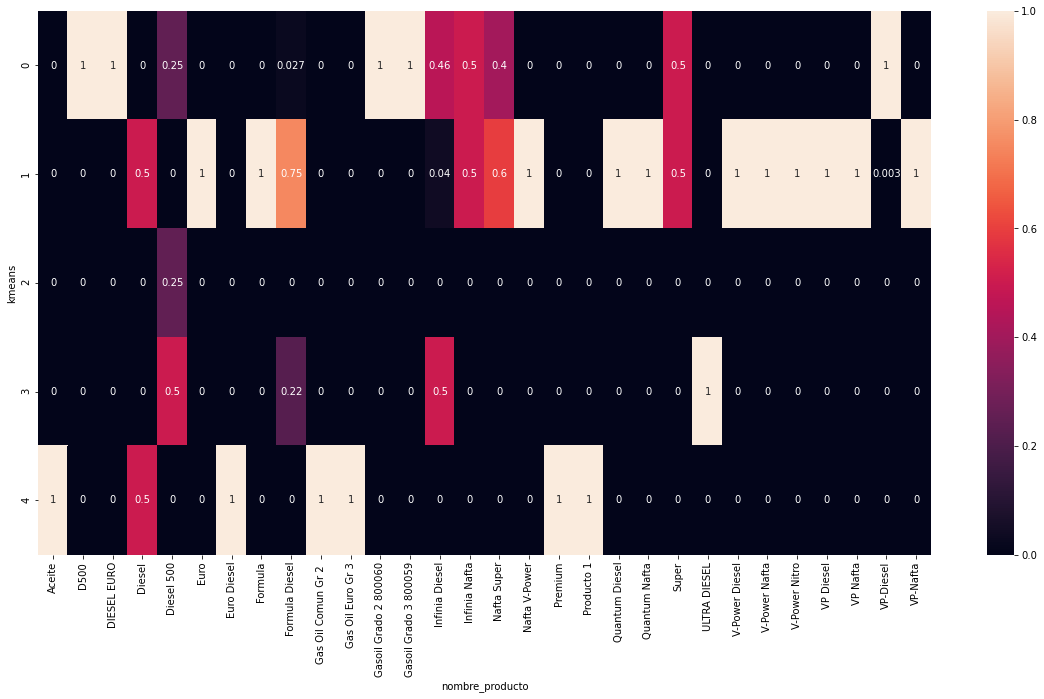

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df_fil.kmeans, df_fil.nombre_producto, normalize='columns'),annot=True)

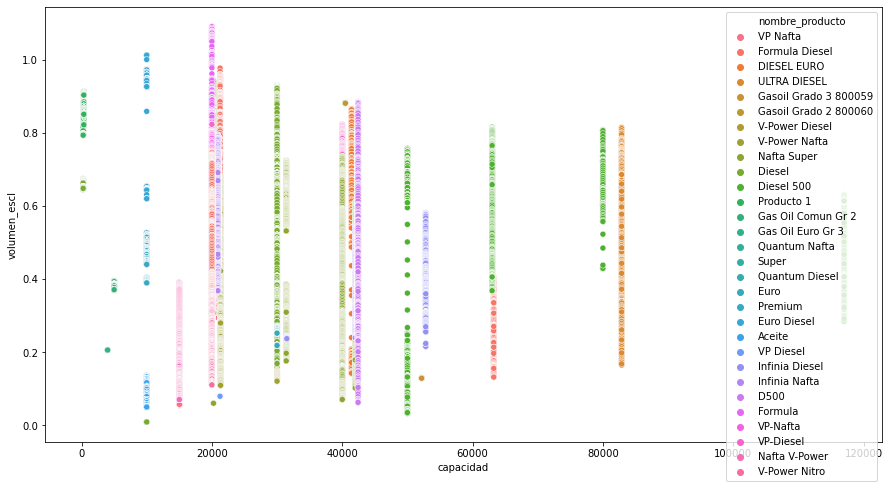

In [53]:
fig = plt.figure(figsize=(15,8))
sns.scatterplot(x=df_fil["capacidad"], y=df_fil["volumen_escl"], hue=df_fil.nombre_producto)
plt.ticklabel_format(style='plain', axis='x') 

### MeanShift

In [46]:
ms = MeanShift(bin_seeding=True)

ms.fit(features)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 6


In [47]:
df_fil['MeanShift'] = ms.labels_ #clusters2

In [48]:
kmean_clusters = go.Scatter(x=features["capacidad"], y=features["volumen_escl"],
                           mode='markers',
                        text=df_fil.loc[:,'id_equipo'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )
data=[kmean_clusters]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title="Capacidad"),
                yaxis=dict(title="Volumen"),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

In [49]:
df_fil.MeanShift.value_counts()

0    36126
1    28512
2    18144
3    11718
4     4032
5     2016
Name: MeanShift, dtype: int64

<AxesSubplot:xlabel='industria', ylabel='MeanShift'>

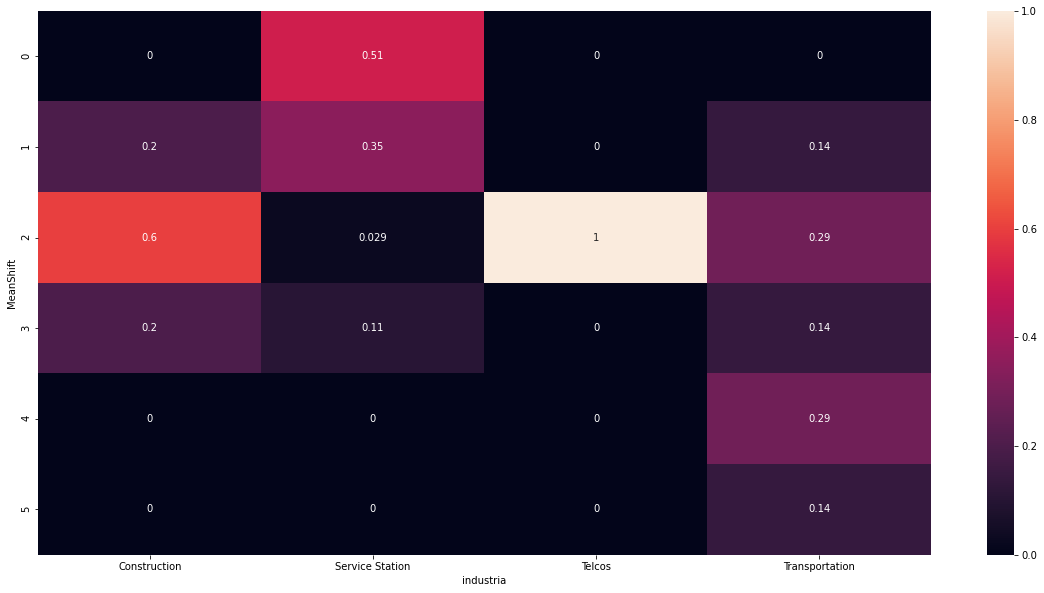

In [50]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df_fil.MeanShift, df_fil.industria, normalize='columns'),annot=True)

<AxesSubplot:xlabel='nombre_producto', ylabel='MeanShift'>

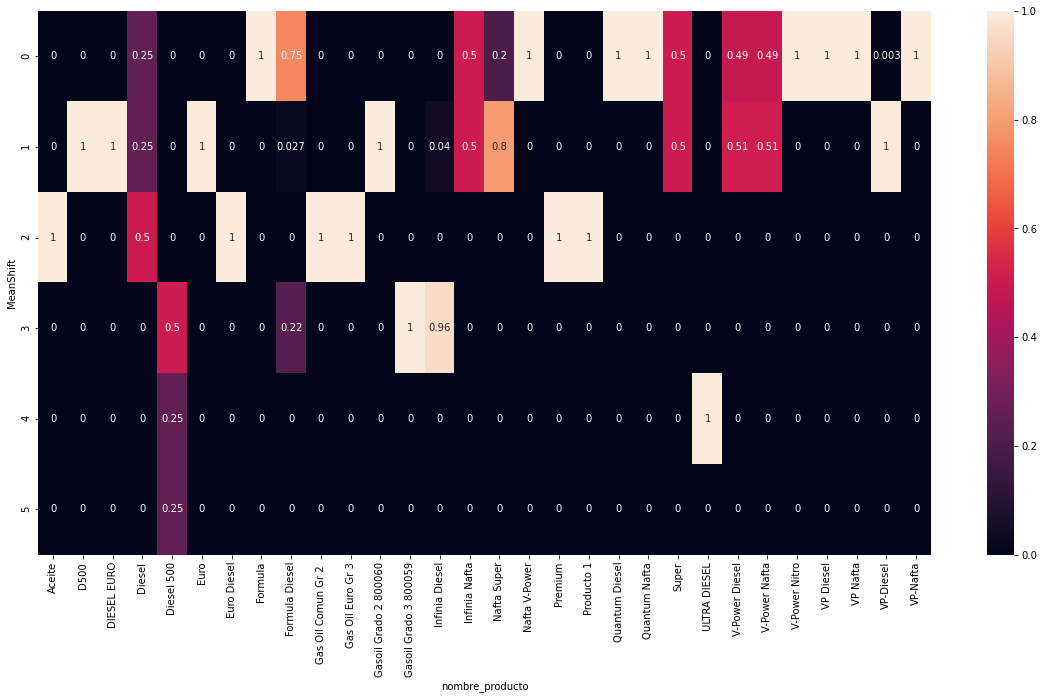

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df_fil.MeanShift, df_fil.nombre_producto, normalize='columns'),annot=True)

In [58]:
metrics.silhouette_score(features, clusters2)

0.7201427642397175